# Watson Studio Lab

Carregando a base de dados

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_58b2fff1efe64e29abda9172ee977f54 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Cq0DGH0_Bi0teBGbG_8ZyxO8VzVHwyKZEdhypc4uieI5',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_58b2fff1efe64e29abda9172ee977f54.get_object(Bucket='talknlabs-donotdelete-pr-66gvqnq2wkq7pm',Key='PublicidadeI.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_IPub = pd.read_csv(body)
df_IPub.head()


,Periodo,Propaganda,Desconto,Vendas
0,16-Feb,8.33,12.0,1528.5
1,16-Mar,83.33,5.5,1560.0
2,16-Apr,25.00,8.0,1419.0
3,16-May,41.67,4.0,1335.0
4,16-Jun,16.67,9.5,1462.5


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

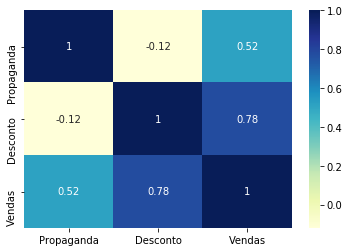

In [3]:
sns.heatmap(df_IPub.corr(), annot= True, cmap="YlGnBu")

# Vamos criar um modelo simples

Carregando bibliotecas de ML

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error



In [5]:
df_IPub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Periodo       17 non-null object
Propaganda    17 non-null float64
Desconto      17 non-null float64
Vendas        17 non-null float64
dtypes: float64(3), object(1)
memory usage: 624.0+ bytes


In [6]:
from sklearn.model_selection import train_test_split

variaveis = ['Propaganda','Desconto']
alvo = ['Vendas']
        
X = df_IPub[variaveis].values
y = df_IPub[alvo].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [7]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_IPub.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_IPub.index)) * 100))

64.71% in training set
35.29% in test set


In [8]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print("Vendas = ",lr_model.intercept_," + ",lr_model.coef_)

Vendas =  1085.0344489465701  +  [ 2.83193412 34.56946124]


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred) )

R2 score: 0.96
Mean Squared Error: 774.68


(array([0.00504382, 0.00252191, 0.00252191, 0.        , 0.00252191,
        0.00504382, 0.00252191, 0.00252191, 0.        , 0.        ,
        0.00252191, 0.00756573, 0.00252191, 0.        , 0.00252191,
        0.        , 0.        , 0.        , 0.00252191, 0.00252191]),
 array([1281.   , 1304.325, 1327.65 , 1350.975, 1374.3  , 1397.625,
        1420.95 , 1444.275, 1467.6  , 1490.925, 1514.25 , 1537.575,
        1560.9  , 1584.225, 1607.55 , 1630.875, 1654.2  , 1677.525,
        1700.85 , 1724.175, 1747.5  ]),
 <a list of 20 Patch objects>)

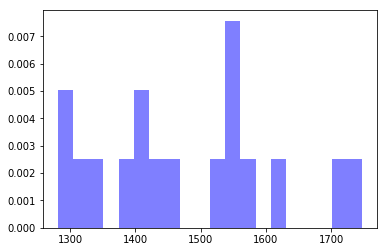

In [11]:
plt.hist(df_IPub.Vendas, color="blue", alpha=0.5, bins=20, density=True)